<a href="https://colab.research.google.com/github/Snape21/PraktikumkelompokML/blob/main/PrakKelompokML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os
import pandas
import numpy as np
import cv2

# Load Data

In [2]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! mkdir /content/drive/MyDrive/PrakKelompokMLdataset/

In [6]:
import opendatasets as od
#materi https://drive.google.com/drive/folders/169QbwGQ_E8_1rB7mr6fZZX1gQw9I9KsC
od.download("https://github.com/ymzhu19eee/dataset_microplastics/archive/refs/heads/master.zip")

108339200it [00:08, 12829584.19it/s]


In [7]:
zip_ref = zipfile.ZipFile('/content/dataset_microplastics-master.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/drive/MyDrive/PrakKelompokMLdataset/') #Extracts the files into the /tmp folder
zip_ref.close()

#error karena di cancel!! (interrupt)

# Pre-Processing

## Splitting

In [2]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import splitfolders
! mkdir /content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/split_data2/

mkdir: cannot create directory ‘/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/split_data2/’: No such file or directory


In [6]:
data_dir = '/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic'
output = '/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/split_data2'
splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(.7, 0.29, 0.01))

Copying files: 719 files [04:20,  2.76 files/s]


## Data Path

In [5]:
# create train, val, test paths
base_dir = '/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/split_data2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [6]:
# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [7]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [8]:
# gather test data
testX = []
testY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            testX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

In [9]:
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape)
print("Test Data=", testX.shape)
print("Test Label=", testY.shape)

Train Data= (500, 150, 150, 3)
Train Label= (500,)
Validation Data= (204, 150, 150, 3)
Validation Label= (204,)
Test Data= (204, 150, 150, 3)
Test Label= (204,)


# train

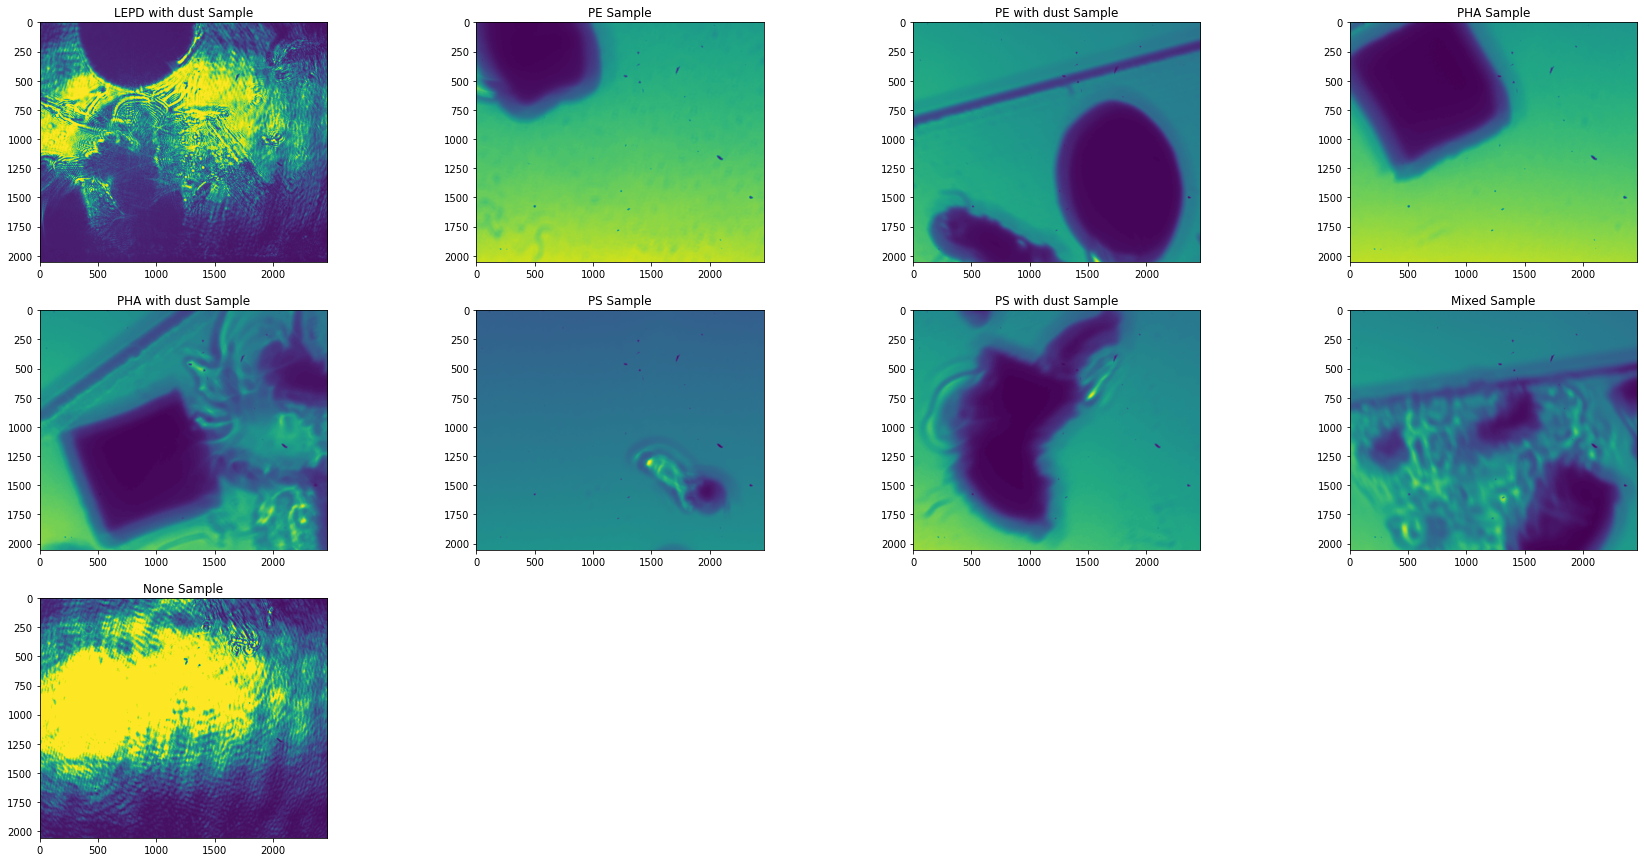

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as implt

lepddust_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/LEPD_with_dust/12.jpg')
pe_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/PE/125.jpg')
pedust_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/PE_with_dust/110.jpg')
pha_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/PHA/110.jpg')
phadust_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/PHA_with_dust/117.jpg')
ps_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/PS/210.jpg')
psdust_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/PS_with_dust/113.jpg')
mixed_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/mixed/2109.jpg')
none_sample=implt.imread('/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/micro_plastic/none/01.jpg')


plt.figure(figsize=(30,15))
plt.subplot(3,4,1)
plt.title('LEPD with dust Sample')
plt.imshow(lepddust_sample)
plt.subplot(3,4,2)
plt.title('PE Sample')
plt.imshow(pe_sample)
plt.subplot(3,4,3)
plt.title('PE with dust Sample')
plt.imshow(pedust_sample)
plt.subplot(3,4,4)
plt.title('PHA Sample')
plt.imshow(pha_sample)
plt.subplot(3,4,5)
plt.title('PHA with dust Sample')
plt.imshow(phadust_sample)
plt.subplot(3,4,6)
plt.title('PS Sample')
plt.imshow(ps_sample)
plt.subplot(3,4,7)
plt.title('PS with dust Sample')
plt.imshow(psdust_sample)
plt.subplot(3,4,8)
plt.title('Mixed Sample')
plt.imshow(mixed_sample)
plt.subplot(3,4,9)
plt.title('None Sample')
plt.imshow(none_sample)

plt.show()

In [11]:
# label encoder implementation in each train & test label
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)

In [12]:
# normalize the scale in every images using ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0,
                             horizontal_flip=True,
                             vertical_flip= True,
                             zoom_range=0.2,
                             shear_range=0.2)

In [19]:
# implement ImageDataGenerator in train, val data, & each label
train_iterator = datagen.flow_from_directory(train_dir, batch_size=20, target_size=(150,150), class_mode='categorical')
val_iterator = datagen.flow_from_directory(validation_dir,  batch_size=20, target_size=(150,150), class_mode='categorical')
print('Batches train=%d, validation=%d' % (len(train_iterator), len(val_iterator)))

Found 500 images belonging to 9 classes.
Found 204 images belonging to 9 classes.
Batches train=25, validation=11


In [20]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten 
from keras.layers import ZeroPadding2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (150,150,3)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',  activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',  activation ='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 256)       295168    
                                                        

In [21]:
#callbacks = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='max')        
directory_to_save_best_model_file = '/content/drive/MyDrive/PrakKelompokMLdataset/2model_praktikumkelompokML_callback.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [22]:
#compile model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
#H = model.fit(train_iterator, epochs=135, validation_data=val_iterator, callbacks = [callbacks, best_model])
H = model.fit(train_iterator, epochs=100, validation_data=val_iterator, callbacks = [best_model])

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 16.9134 - accuracy: 0.2300
Epoch 1: val_accuracy improved from -inf to 0.26961, saving model to /content/drive/MyDrive/PrakKelompokMLdataset/2model_praktikumkelompokML_callback.h5
25/25 [==============================] - 34s 965ms/step - loss: 16.9134 - accuracy: 0.2300 - val_loss: 2.1067 - val_accuracy: 0.2696
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 2.0763 - accuracy: 0.2420
Epoch 2: val_accuracy improved from 0.26961 to 0.34804, saving model to /content/drive/MyDrive/PrakKelompokMLdataset/2model_praktikumkelompokML_callback.h5
25/25 [==============================] - 26s 1s/step - loss: 2.0763 - accuracy: 0.2420 - val_loss: 2.0931 - val_accuracy: 0.3480
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 2.1090 - accuracy: 0.2320
Epoch 3: val_accuracy did not improve from 0.34804
25/25 [==============================] - 23s 942ms/step - loss: 2.1090 - accuracy: 0.2320 - 

# evaluasi & test

In [19]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [14]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/drive/MyDrive/PrakKelompokMLdataset/2model_praktikumkelompokML_callback.h5'
model = load_model(model_path)

Found 15 images belonging to 9 classes.
1/1 [==============================] - 3s 3s/step
Accuracy  : 0.06666666666666667
Precision : 0.05
f1Score : 0.05714285714285715
[[0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0]
 [1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 2 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0]]


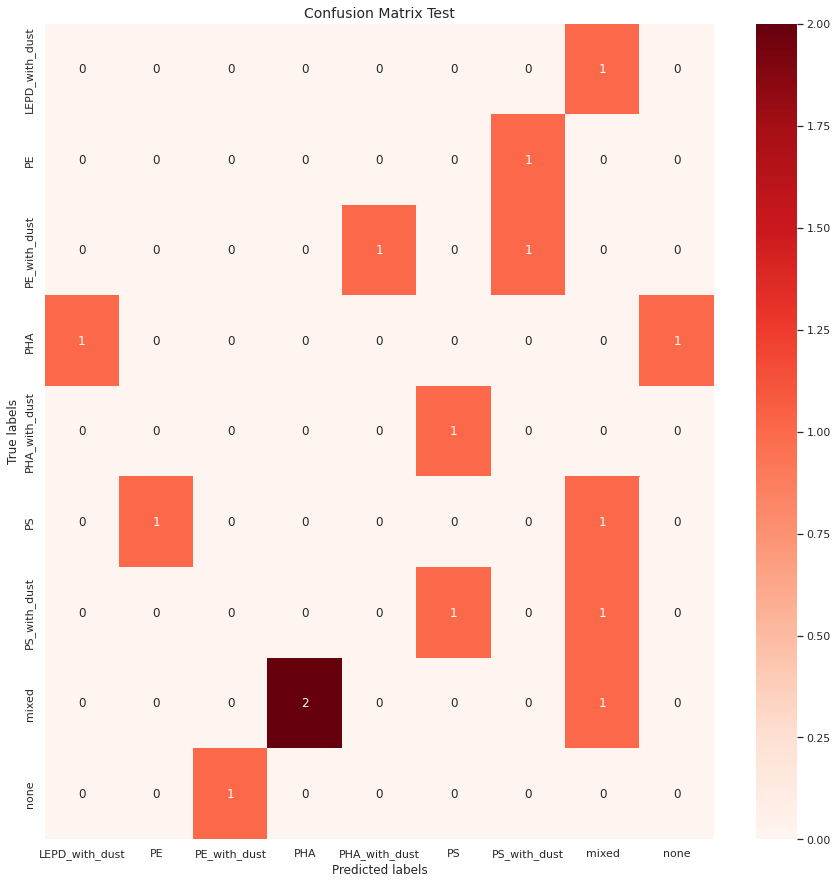

In [16]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150

#test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/drive/MyDrive/PrakKelompokMLdataset/dataset_microplastics-master/split_data2/test'
test_iterator = datagen.flow_from_directory(TESTING_DIR, batch_size=27, target_size=(150,150), class_mode='categorical')
#test_generator = test_datagen.flow_from_directory(TESTING_DIR,batch_size=BATCH_SIZE,target_size=(height, width),class_mode= 'categorical', shuffle=False )

predictions = model.predict(test_iterator)
yPredictions = predictions > 0.5
#yPredictions = (predictions > 0.005).astype(np.int)
true_classes = test_iterator.classes
rounded_yPredictions = np.argmax(yPredictions, axis=1)
class_names = test_iterator.class_indices
Cmatrix_test = confusion_matrix(true_classes, rounded_yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, rounded_yPredictions)

plt.figure(figsize=(15,15))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(9,9)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, rounded_yPredictions, target_names=class_names))

                precision    recall  f1-score   support

LEPD_with_dust       0.00      0.00      0.00         1
            PE       0.00      0.00      0.00         1
  PE_with_dust       0.00      0.00      0.00         2
           PHA       0.00      0.00      0.00         2
 PHA_with_dust       0.00      0.00      0.00         1
            PS       0.00      0.00      0.00         2
  PS_with_dust       0.00      0.00      0.00         2
         mixed       0.25      0.33      0.29         3
          none       0.00      0.00      0.00         1

      accuracy                           0.07        15
     macro avg       0.03      0.04      0.03        15
  weighted avg       0.05      0.07      0.06        15



# save model

In [45]:
%cd /content/drive/MyDrive/PrakKelompokMLdataset/
%ls

/content/drive/MyDrive/PrakKelompokMLdataset
2model_praktikumkelompokML_callback.h5  model_praktikumkelompokML_callback.h5
dataset_microplastics-master/


In [46]:
import tensorflow as tf

model = tf.keras.models.load_model('2model_praktikumkelompokML_callback.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

360580528